# Part 1 - Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import quantile_transform
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Part 2 - Data Import and Organization

Patient Descriptors

In [3]:
#import the file
df = pd.read_csv(r"C:\Users\noahb\OneDrive\Documents\Tensorflow_Tutorial\mini_project\descriptors.txt")

In [4]:
df.head()

,Group\tAccession\tTitle\tSource name\tStudy\tTissue\tAgent\tRisk\tSpecimen\tLab\tSpecimen treatment\tPatient
0,low
1,GSM1539985\tSPECIFICITY STUDY::Concentration0X...
2,low
3,GSM1539986\tSPECIFICITY STUDY::Concentration0X...
4,low


In [5]:
#create new df
descriptors_df = pd.DataFrame(data=None, columns=['class', 'name']) #create df with two columns
for x in range(0, 310): #iterate through 155 critical rows (somereason does each twice)
    row = [] #set appending row to zero
    temp = [str(df.iloc[x]), str(df.iloc[x+1])] #get a holder for the two values
    
    if "low" in temp[0]: #get class for first entry
        row.append("low")
    elif "high" in temp[0]:
        row.append("high")
    else:
        continue
    
    if "GSM" in temp[1]: #get GSM number from each entry, it's at a strange spot
        row.append(temp[1][temp[1].find('GSM'):temp[1].find('GSM')+10])
    
    row_dict = {'class': row[0], 'name': row[1]} #create appending dictionary
    descriptors_df = descriptors_df.append(row_dict, ignore_index=True) #append dictionary to df

In [6]:
descriptors_df.head()

,class,name
0,low,GSM1539985
1,low,GSM1539986
2,low,GSM1539987
3,low,GSM1539988
4,low,GSM1539989


In [7]:
#slight modification to index
descriptors_df = descriptors_df.set_index('name') #set name of patient as index to their status
descriptors_df.head()

,class
name,
GSM1539985,low
GSM1539986,low
GSM1539987,low
GSM1539988,low
GSM1539989,low


Import and Organize

In [8]:
#import the file
df = pd.read_csv(r"C:\Users\noahb\OneDrive\Documents\Tensorflow_Tutorial\mini_project\NSCLC_Data", index_col="Unnamed: 0")

In [9]:
df.head()

,GSM1539970,GSM1539971,GSM1539972,GSM1539973,GSM1539974,GSM1539975,GSM1539976,GSM1539977,GSM1539978,GSM1539979,...,GSM1540370,GSM1540371,GSM1540372,GSM1540373,GSM1540374,GSM1540375,GSM1540376,GSM1540377,GSM1540378,GSM1540379
1007_s_at,10.464044,10.461127,10.570953,10.513374,10.516378,10.490257,10.460163,10.457428,10.504738,10.442638,...,9.988729,9.743330,9.966676,9.948810,9.972221,9.957228,9.961547,9.949829,9.841374,9.798317
1053_at,6.927708,6.645768,6.912725,6.874800,6.812996,6.777046,6.687495,6.864216,6.851013,6.785617,...,6.535750,6.546182,6.627127,6.521849,6.585274,6.639613,6.509437,6.577825,6.676129,6.230006
117_at,8.811800,8.617839,8.655456,8.733307,8.750869,8.690262,8.747771,8.715570,8.738984,8.592905,...,7.210692,7.286612,7.181658,7.268705,7.273681,7.544095,7.389453,7.037891,7.275374,7.162832
121_at,7.045294,7.174063,7.178106,7.098498,6.986867,7.214436,6.950130,7.148536,7.039930,7.182441,...,6.467075,6.386722,6.759884,6.484677,6.577028,6.440214,6.796309,6.757738,6.638337,6.756173
1255_g_at,3.719443,4.092665,3.901686,4.306990,4.036441,4.206622,4.052753,4.210017,3.934722,4.239380,...,2.940709,2.788086,2.852153,2.912606,2.886582,2.674049,3.004240,2.960987,2.970267,3.003413


In [10]:
exprs_df = df

# Part 3 - Binarize the Risk Factor

In [11]:
#check to make sure all of the patients in each df are the same:
ExprsPat = exprs_df.columns
ClassPat = descriptors_df.index

checker = False
for entry in ExprsPat:
    checker = False
    for name in ClassPat:
        if entry == name:
            checker = True
            pass
    if checker == False:
        print("Zamn")
        break

print('done!')

done!


In [12]:
#reorder descriptors_df to be in same order as exprs_df
ExprsPat = exprs_df.columns
NewDesc_df = pd.DataFrame(data=None, columns=['class'])

for x in ExprsPat:
    new = descriptors_df.loc[x]
    NewDesc_df = NewDesc_df.append(new, ignore_index=False)

In [13]:
NewDesc_df.head()

,class
GSM1539970,high
GSM1539971,high
GSM1539972,high
GSM1539973,high
GSM1539974,high


In [14]:
#binarize it into a list
#zero is false, one is true - zero is low, one is high
outcomes = []
for x in NewDesc_df.index:
    if NewDesc_df.loc[x][0] == 'high':
        outcomes.append(1)
    else:
        outcomes.append(0)

In [15]:
print(outcomes[1:10])
print(outcomes[len(outcomes)-9:len(outcomes)])

[1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0]


# Part 4 - Quantile Normalize the expression data

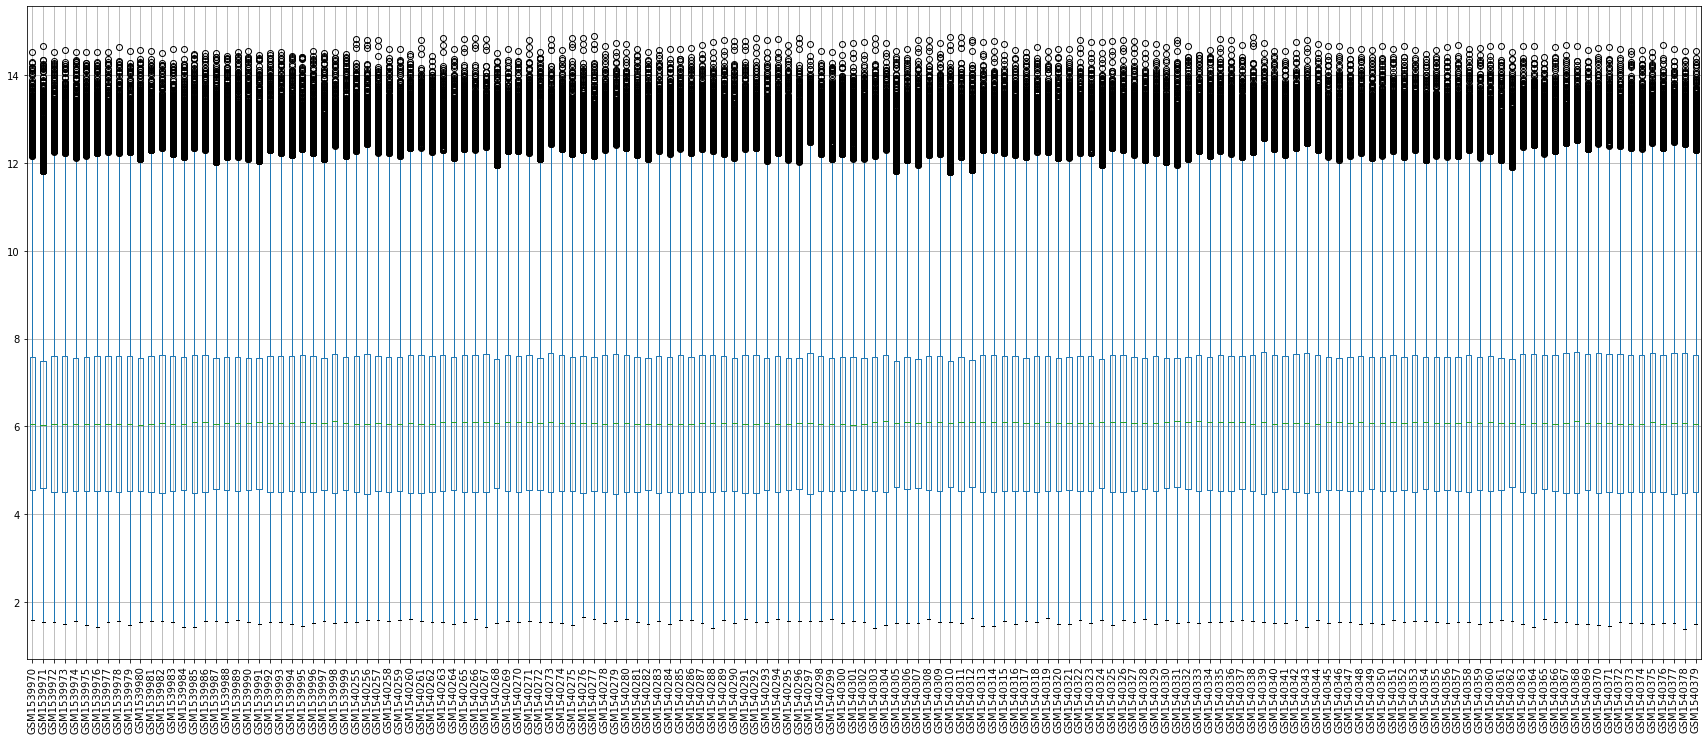

In [16]:
#create initial boxplot of log2 data (log2 doesn't impact quantile transform)
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
exprs_df.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

In [17]:
#convert df into numpy array
exprs_num = exprs_df.values
exprs_num[1:10, 1:5]

array([[6.6457681 , 6.9127252 , 6.87479987, 6.81299556],
       [8.61783918, 8.65545592, 8.73330696, 8.75086864],
       [7.17406269, 7.17810636, 7.09849812, 6.98686712],
       [4.09266467, 3.90168575, 4.30698973, 4.03644128],
       [9.03754759, 8.88695786, 8.96419459, 8.99944757],
       [7.19334483, 7.24241896, 7.18211238, 7.14852906],
       [6.02996204, 6.25066575, 6.17082622, 6.12253854],
       [8.9250425 , 8.9139526 , 8.93297283, 8.84805026],
       [4.76983977, 4.38729255, 4.62363522, 4.55595271]])

In [18]:
#quantile transform the data
normal_exprs = quantile_transform(exprs_num, random_state=100, axis=0)

In [19]:
#turn it back into a df
normal_df = pd.DataFrame(normal_exprs, columns=exprs_df.columns)
normal_df = normal_df.set_index(exprs_df.index, 'gene')

C:\Users\noahb\AppData\Local\Temp/ipykernel_16964/3648454302.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  normal_df = normal_df.set_index(exprs_df.index, 'gene')


In [20]:
normal_df.head()

,GSM1539970,GSM1539971,GSM1539972,GSM1539973,GSM1539974,GSM1539975,GSM1539976,GSM1539977,GSM1539978,GSM1539979,...,GSM1540370,GSM1540371,GSM1540372,GSM1540373,GSM1540374,GSM1540375,GSM1540376,GSM1540377,GSM1540378,GSM1540379
1007_s_at,0.974312,0.974504,0.976309,0.975302,0.974972,0.974868,0.973791,0.973563,0.974965,0.973400,...,0.959416,0.950144,0.959171,0.959189,0.959916,0.958966,0.959089,0.958571,0.954269,0.954610
1053_at,0.646020,0.613311,0.644169,0.637784,0.632770,0.624308,0.604753,0.633542,0.632711,0.621984,...,0.574265,0.577950,0.594038,0.576534,0.588095,0.590770,0.575317,0.582272,0.597294,0.529933
117_at,0.890805,0.880505,0.876701,0.884309,0.886920,0.881015,0.885007,0.881674,0.884189,0.869869,...,0.682146,0.695680,0.681497,0.695015,0.696939,0.730098,0.713059,0.653777,0.692277,0.682390
121_at,0.666318,0.703672,0.687130,0.673667,0.661394,0.695513,0.649265,0.679878,0.664799,0.685991,...,0.563760,0.551677,0.614932,0.570591,0.586668,0.557445,0.621086,0.610301,0.591061,0.618236
1255_g_at,0.152910,0.186015,0.176915,0.221855,0.189186,0.209131,0.190011,0.210115,0.178177,0.213766,...,0.083451,0.069109,0.074669,0.077176,0.075409,0.058542,0.088024,0.086376,0.086927,0.086813


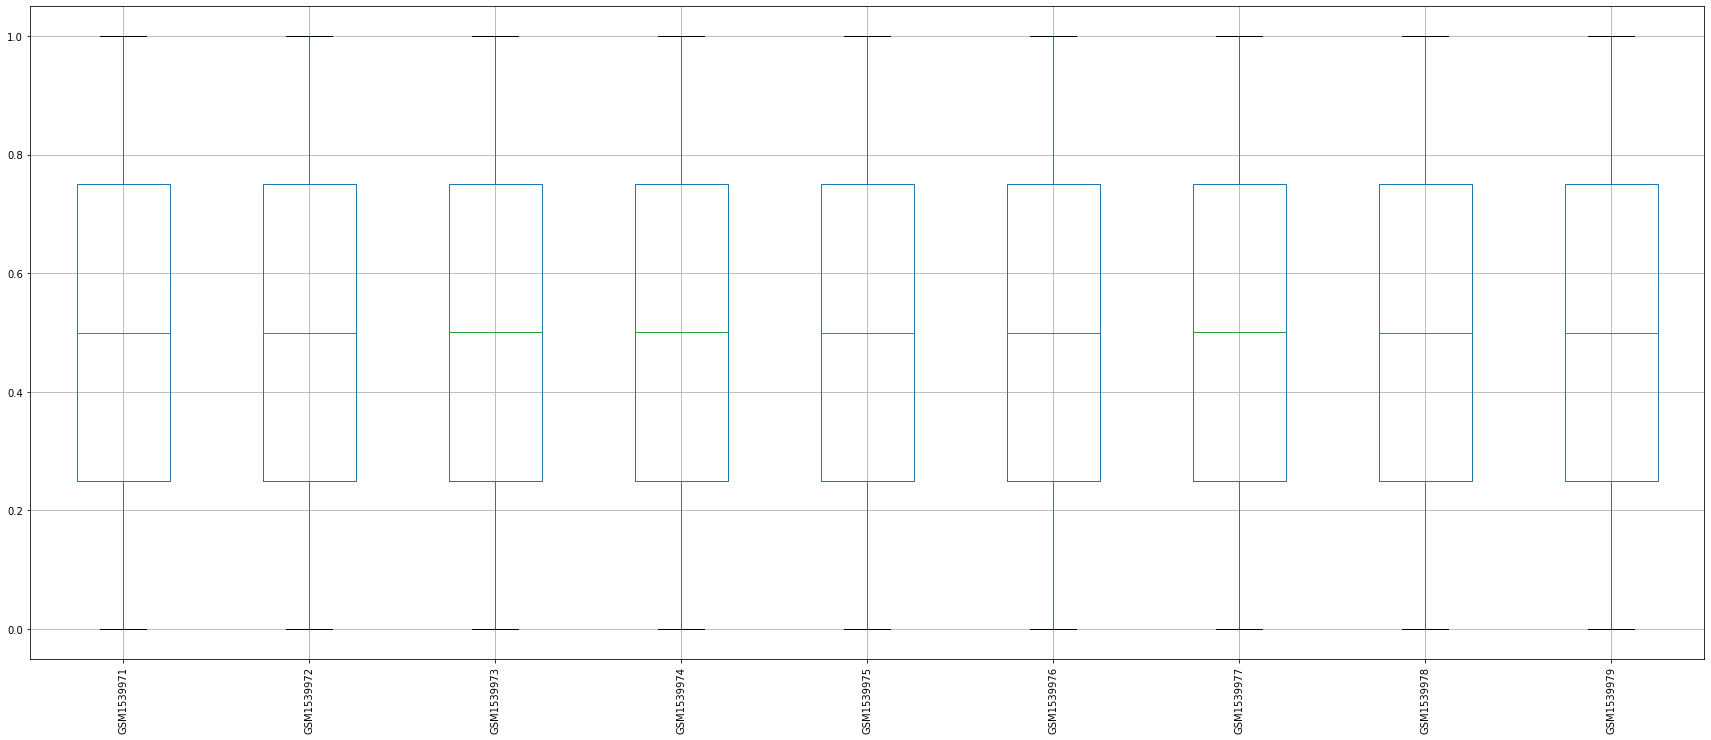

In [21]:
#graph the normalized as a box plot
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
normal_df.iloc[:, 1:10].boxplot(ax=ax) #just to get a better view of the samples
plt.xticks(rotation=90)
plt.show()

In [22]:
#check if the max and min in entire df is really 0 and 1 anti-respectively
#find min
min = normal_exprs[0,0]
rows, cols = normal_exprs.shape
for row in range(rows):
    for col in range(cols):
        temp = normal_exprs[row, col]
        if temp < min:
            min = temp
print(min)

#find max
max = normal_exprs[0,0]
rows, cols = normal_exprs.shape
for row in range(rows):
    for col in range(cols):
        temp = normal_exprs[row, col]
        if temp > max:
            max = temp
print(max)

0.0
1.0


# Part 5 - Feature extract to 30x30 variables 

In [24]:
#load in top p-value genes from GEO2R data
exprs_genes = pd.read_csv(r"C:\Users\noahb\OneDrive\Documents\Tensorflow_Tutorial\mini_project\GSE63074toptable.tsv",
                          delim_whitespace=True)
exprs_genes.head()

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,237822_at,5.940000e-97,1.090000e-101,-53.180044,220.14213,-3.411071,NaN,NaN
1,240501_at,1.690000e-80,6.180000e-85,-40.764904,182.75668,-2.243506,NaN,NaN
2,214318_s_at,1.400000e-71,7.680000e-76,35.115560,162.22704,1.385832,FRY,FRYmicrotubulebindingprotein
3,233398_at,1.860000e-69,1.360000e-73,-33.818728,157.12919,-1.711378,NaN,NaN
4,201010_s_at,7.600000e-69,6.950000e-73,33.418762,155.52534,1.347150,TXNIP,thioredoxininteractingprotein


In [46]:
#pull out list of top 900 gene.symbols
check_df = pd.isnull(exprs_genes)
top_genes = []
select_ids = []
row = 0
while len(top_genes) < 900:
    if not check_df.loc[row, "Gene.symbol"]:
        top_genes.append(exprs_genes.loc[row, "Gene.symbol"])
        select_ids.append(exprs_genes.loc[row, 'ID'])
    row+=1

In [47]:
print(top_genes[0:10], len(top_genes))
print(select_ids[0:10])

['FRY', 'TXNIP', 'FRY', 'LRRN4', 'LRRN4', 'TXNIP', 'CENPF', 'SKP2', 'SOX2', 'EIF3B'] 900
['214318_s_at', '201010_s_at', '214319_at', '1553169_at', '1553171_x_at', '201009_s_at', '207828_s_at', '203625_x_at', '228038_at', '203462_x_at']


In [49]:
#create df of top selected values (normalized ofc)
data_df = pd.DataFrame(data=None, columns=normal_df.columns)
for row in select_ids:
    data_df = data_df.append(normal_df.loc[row, :], ignore_index=False)

In [50]:
data_df.head()

,GSM1539970,GSM1539971,GSM1539972,GSM1539973,GSM1539974,GSM1539975,GSM1539976,GSM1539977,GSM1539978,GSM1539979,...,GSM1540370,GSM1540371,GSM1540372,GSM1540373,GSM1540374,GSM1540375,GSM1540376,GSM1540377,GSM1540378,GSM1540379
214318_s_at,0.225009,0.175897,0.266494,0.226234,0.207195,0.224794,0.220879,0.255220,0.206237,0.244108,...,0.477786,0.442728,0.411355,0.408368,0.429466,0.395880,0.461591,0.450054,0.457013,0.425646
201010_s_at,0.981837,0.982473,0.983050,0.981403,0.983124,0.982073,0.982497,0.983385,0.982629,0.983415,...,0.996389,0.996480,0.996292,0.996212,0.996351,0.995810,0.996580,0.996421,0.996537,0.996050
214319_at,0.356847,0.390309,0.429196,0.365053,0.350972,0.381942,0.344573,0.389592,0.380559,0.440860,...,0.588580,0.576577,0.560776,0.612071,0.563093,0.594574,0.566871,0.541548,0.541018,0.537241
1553169_at,0.119188,0.172440,0.123880,0.114260,0.153713,0.121863,0.116463,0.139033,0.114654,0.113826,...,0.412711,0.464889,0.435809,0.453764,0.479009,0.501447,0.500031,0.537895,0.480986,0.495147
1553171_x_at,0.092092,0.101269,0.082254,0.110006,0.155114,0.083550,0.128850,0.121121,0.099764,0.073315,...,0.454454,0.468468,0.460665,0.466387,0.542377,0.500926,0.518244,0.563022,0.502144,0.481200


In [51]:
#check shape
print(data_df.shape)

(900, 155)


# Part 6 - Transpose the Matrix and add Class

In [52]:
#transpose the matrix
final_mat = data_df.T
final_mat.head()

,214318_s_at,201010_s_at,214319_at,1553169_at,1553171_x_at,201009_s_at,207828_s_at,203625_x_at,228038_at,203462_x_at,...,205612_at,204754_at,37831_at,231129_at,201968_s_at,225918_at,1561939_at,229122_x_at,1558423_at,236386_at
GSM1539970,0.225009,0.981837,0.356847,0.119188,0.092092,0.953103,0.931396,0.919823,0.935285,0.943560,...,0.094365,0.228057,0.702430,0.248189,0.918238,0.824214,0.518485,0.744490,0.755489,0.325580
GSM1539971,0.175897,0.982473,0.390309,0.172440,0.101269,0.949333,0.924008,0.911031,0.937842,0.943432,...,0.077115,0.328825,0.741480,0.318701,0.908869,0.817719,0.491887,0.768876,0.801784,0.246649
GSM1539972,0.266494,0.983050,0.429196,0.123880,0.082254,0.944757,0.915266,0.906183,0.931640,0.942690,...,0.151973,0.268994,0.706649,0.247497,0.916733,0.841547,0.505804,0.730184,0.799799,0.313857
GSM1539973,0.226234,0.981403,0.365053,0.114260,0.110006,0.949255,0.919211,0.913026,0.941322,0.942762,...,0.109187,0.264366,0.694562,0.269918,0.916751,0.827762,0.521624,0.745205,0.770430,0.315309
GSM1539974,0.207195,0.983124,0.350972,0.153713,0.155114,0.947540,0.929621,0.909739,0.942415,0.942343,...,0.109304,0.286019,0.722961,0.343079,0.912352,0.832900,0.486199,0.750703,0.773730,0.305557


In [53]:
#add risk column
final_mat['Class'] = outcomes

In [54]:
final_mat.iloc[0:5, 896:901]

,1561939_at,229122_x_at,1558423_at,236386_at,Class
GSM1539970,0.518485,0.744490,0.755489,0.325580,1
GSM1539971,0.491887,0.768876,0.801784,0.246649,1
GSM1539972,0.505804,0.730184,0.799799,0.313857,1
GSM1539973,0.521624,0.745205,0.770430,0.315309,1
GSM1539974,0.486199,0.750703,0.773730,0.305557,1


# Part 7 - Shuffle the Samples

In [55]:
#shuffle the dataframe
shuffle_data = final_mat.sample(frac=1)

In [56]:
shuffle_data.head()

,214318_s_at,201010_s_at,214319_at,1553169_at,1553171_x_at,201009_s_at,207828_s_at,203625_x_at,228038_at,203462_x_at,...,204754_at,37831_at,231129_at,201968_s_at,225918_at,1561939_at,229122_x_at,1558423_at,236386_at,Class
GSM1540269,0.434766,0.992541,0.681119,0.656498,0.673069,0.987336,0.765152,0.817701,0.586587,0.888274,...,0.734105,0.749872,0.224078,0.947817,0.815948,0.377899,0.719723,0.708040,0.273586,0
GSM1540356,0.230241,0.980150,0.386415,0.149669,0.204589,0.939651,0.892245,0.925437,0.906639,0.932324,...,0.383238,0.687287,0.362811,0.924016,0.881257,0.641244,0.749380,0.803208,0.268219,1
GSM1540321,0.446088,0.993726,0.681589,0.617616,0.622739,0.986690,0.785905,0.794085,0.535121,0.891104,...,0.663488,0.753122,0.227404,0.951362,0.769472,0.339134,0.699405,0.728662,0.216836,0
GSM1540342,0.424666,0.996209,0.563750,0.523241,0.528465,0.992554,0.758873,0.776599,0.250050,0.903659,...,0.563926,0.766286,0.204148,0.937264,0.776351,0.434132,0.700410,0.652864,0.234696,0
GSM1540314,0.455210,0.994118,0.659881,0.669516,0.659992,0.986797,0.781950,0.800684,0.570721,0.894628,...,0.636401,0.719470,0.222770,0.952989,0.816872,0.389401,0.721395,0.657831,0.241212,0


# Part 8 - Prepare the data

In [57]:
#determine the datatypes of each column
shuffle_data.dtypes

214318_s_at     float64
201010_s_at     float64
214319_at       float64
1553169_at      float64
1553171_x_at    float64
                 ...   
1561939_at      float64
229122_x_at     float64
1558423_at      float64
236386_at       float64
Class             int64
Length: 901, dtype: object

In [58]:
#get save and pop the final class column
risk_factor = shuffle_data.pop('Class')
print(risk_factor[0:10])

GSM1540269    0
GSM1540356    1
GSM1540321    0
GSM1540342    0
GSM1540314    0
GSM1540262    1
GSM1540322    0
GSM1540271    0
GSM1539971    1
GSM1539994    0
Name: Class, dtype: int64


In [59]:
risk_factor.head()

GSM1540269    0
GSM1540356    1
GSM1540321    0
GSM1540342    0
GSM1540314    0
Name: Class, dtype: int64

In [60]:
# convert df to an array
numeric_feature_names = shuffle_data.columns
numeric_features = shuffle_data[numeric_feature_names]
numeric_features.head()

,214318_s_at,201010_s_at,214319_at,1553169_at,1553171_x_at,201009_s_at,207828_s_at,203625_x_at,228038_at,203462_x_at,...,205612_at,204754_at,37831_at,231129_at,201968_s_at,225918_at,1561939_at,229122_x_at,1558423_at,236386_at
GSM1540269,0.434766,0.992541,0.681119,0.656498,0.673069,0.987336,0.765152,0.817701,0.586587,0.888274,...,0.214892,0.734105,0.749872,0.224078,0.947817,0.815948,0.377899,0.719723,0.708040,0.273586
GSM1540356,0.230241,0.980150,0.386415,0.149669,0.204589,0.939651,0.892245,0.925437,0.906639,0.932324,...,0.101493,0.383238,0.687287,0.362811,0.924016,0.881257,0.641244,0.749380,0.803208,0.268219
GSM1540321,0.446088,0.993726,0.681589,0.617616,0.622739,0.986690,0.785905,0.794085,0.535121,0.891104,...,0.162000,0.663488,0.753122,0.227404,0.951362,0.769472,0.339134,0.699405,0.728662,0.216836
GSM1540342,0.424666,0.996209,0.563750,0.523241,0.528465,0.992554,0.758873,0.776599,0.250050,0.903659,...,0.160819,0.563926,0.766286,0.204148,0.937264,0.776351,0.434132,0.700410,0.652864,0.234696
GSM1540314,0.455210,0.994118,0.659881,0.669516,0.659992,0.986797,0.781950,0.800684,0.570721,0.894628,...,0.194312,0.636401,0.719470,0.222770,0.952989,0.816872,0.389401,0.721395,0.657831,0.241212


In [61]:
#convert to tf tensor
tf.convert_to_tensor(numeric_features, dtype='float32')

<tf.Tensor: shape=(155, 900), dtype=float32, numpy=
array([[0.4347664 , 0.9925411 , 0.6811189 , ..., 0.7197227 , 0.7080402 ,
        0.27358577],
       [0.23024082, 0.9801497 , 0.38641533, ..., 0.7493797 , 0.80320805,
        0.26821932],
       [0.44608793, 0.99372584, 0.6815887 , ..., 0.69940513, 0.72866166,
        0.21683644],
       ...,
       [0.23784542, 0.98262185, 0.36431903, ..., 0.70989203, 0.80180013,
        0.27324036],
       [0.27849513, 0.98207784, 0.41545472, ..., 0.7157398 , 0.76603913,
        0.3132446 ],
       [0.40836844, 0.99621177, 0.612071  , ..., 0.66985446, 0.66555995,
        0.19680505]], dtype=float32)>

# Part 9 - Make the 70/30 Split

In [62]:
#data is shuffled so can just partition it
#converting the targets - risk_factor
risk_factor_train = risk_factor[0:109]
risk_factor_test = risk_factor[109:]

In [63]:
#partitioning the tensor numeric - numeric features
numeric_features_train = numeric_features[0:109]
numeric_features_test = numeric_features[109:]

# Part 10 - Build the Model

In [64]:
#make the model
model = keras.Sequential(
[
    keras.Input(shape=(30*30)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(2),
])

In [65]:
#compile the model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #from logits builds softmax into the final output layer
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

# Part 11 - Train and Test The Model

In [66]:
#start training the model
model.fit(numeric_features_train, risk_factor_train, epochs=15, batch_size=8, verbose=2)

Epoch 1/15
14/14 - 0s - loss: 0.6505 - accuracy: 0.5780
Epoch 2/15
14/14 - 0s - loss: 0.3826 - accuracy: 1.0000
Epoch 3/15
14/14 - 0s - loss: 0.2060 - accuracy: 1.0000
Epoch 4/15
14/14 - 0s - loss: 0.1183 - accuracy: 1.0000
Epoch 5/15
14/14 - 0s - loss: 0.0640 - accuracy: 1.0000
Epoch 6/15
14/14 - 0s - loss: 0.0457 - accuracy: 1.0000
Epoch 7/15
14/14 - 0s - loss: 0.0288 - accuracy: 1.0000
Epoch 8/15
14/14 - 0s - loss: 0.0227 - accuracy: 1.0000
Epoch 9/15
14/14 - 0s - loss: 0.0161 - accuracy: 1.0000
Epoch 10/15
14/14 - 0s - loss: 0.0120 - accuracy: 1.0000
Epoch 11/15
14/14 - 0s - loss: 0.0104 - accuracy: 1.0000
Epoch 12/15
14/14 - 0s - loss: 0.0089 - accuracy: 1.0000
Epoch 13/15
14/14 - 0s - loss: 0.0065 - accuracy: 1.0000
Epoch 14/15
14/14 - 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 15/15
14/14 - 0s - loss: 0.0050 - accuracy: 1.0000


In [67]:
#test the model
model.evaluate(numeric_features_test, risk_factor_test, batch_size=8, verbose=2)

6/6 - 0s - loss: 0.0049 - accuracy: 1.0000


[0.004896525293588638, 1.0]